Coefficients: 
 [938.23786125]
Mean squared error: 0.15
Coefficient of determination: 0.47


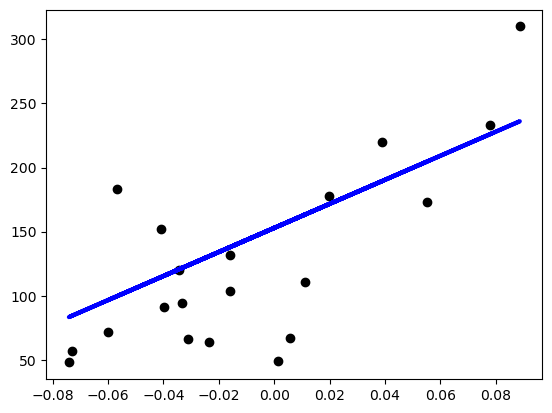

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Load the diabetes dataset
# 1. 데어터 셋 로드
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
#print(diabetes_X.shape)
#print(diabetes_y.shape)

# Use only one feature
# 2.하나의 특징만 추출
diabetes_X = diabetes_X[:, np.newaxis, 2]
#print(diabetes_X.shape)

# Split the data into training/testing sets
# 3.입력값에 대한 훈련/테스트 데이터셋 분리
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
# 4.출력값에 대한 훈련/테스트 데이터셋 분리
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
# 5.선형회귀에 대한 모델 로드
regr = linear_model.LinearRegression()
#regr = LinearRegression()

# Train the model using the training sets
# 6.선형회귀 훈련
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
# 7.테스트 입력값으로 예측하기
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
# 8.기울기 값 출력
print("Coefficients: \n", regr.coef_)
# The mean squared error
# 9.MSE 계산 0에 가까울 수록 완벽
#print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test/np.mean(diabetes_y_test), 
                                                      diabetes_y_pred/np.mean(diabetes_y_pred)))
# The coefficient of determination: 1 is perfect prediction
# 10.R^2 값 계산 1에 가까울 수록 완벽
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
# 결과값 산포도와 라인 겹쳐서 출력하기
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

#plt.xticks(())
#plt.yticks(())
#수치적으로 그래프를 관찰하고 싶다면 ticks를 지워준다

plt.show()

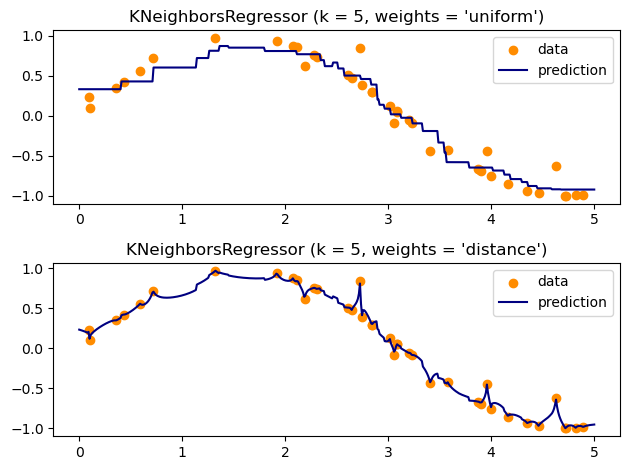

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
#from sklearn.neighbors import kNeighborsRegressor
# 1.입출력값 설정
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
# 2.데이터 내 노이즈 주입
y[::5] += 1 * (0.5 - np.random.rand(8))

# 3. k값 설정
n_neighbors = 5

# 4.가중치 설정
for i, weights in enumerate(["uniform", "distance"]):
    # 5. 모델 로드
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    # 6.모델 훈련
    y_ = knn.fit(X, y).predict(T)
    # 7.입출력값/예측값 산포도+라인 출력
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()


In [14]:
# %%
# First load the copy of the Iris dataset shipped with scikit-learn:
from sklearn.datasets import load_iris

iris = load_iris()


# %%
# Display the decision functions of trees trained on all pairs of features.
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay


# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

# %%
# Display the structure of a single decision tree trained on all the features
# together.
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()


ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (C:\Users\USER\anaconda3\lib\site-packages\sklearn\inspection\__init__.py)